<a id="1"></a>

<h1 style="font-family:newtimeroman;font-size:150%;text-align:left">Wine_Quality-Analysis & Visualization</h1>


In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')
plt.rc('figure',figsize=(17,13))
sbn.set_style('darkgrid')
%matplotlib inline

In [2]:
#Loading Dataset
df=pd.read_csv('winequality.csv')

In [3]:
#head of dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [4]:
#tail of dataset
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,0


In [5]:
#viewing shape of dataset
df.shape

(4898, 12)

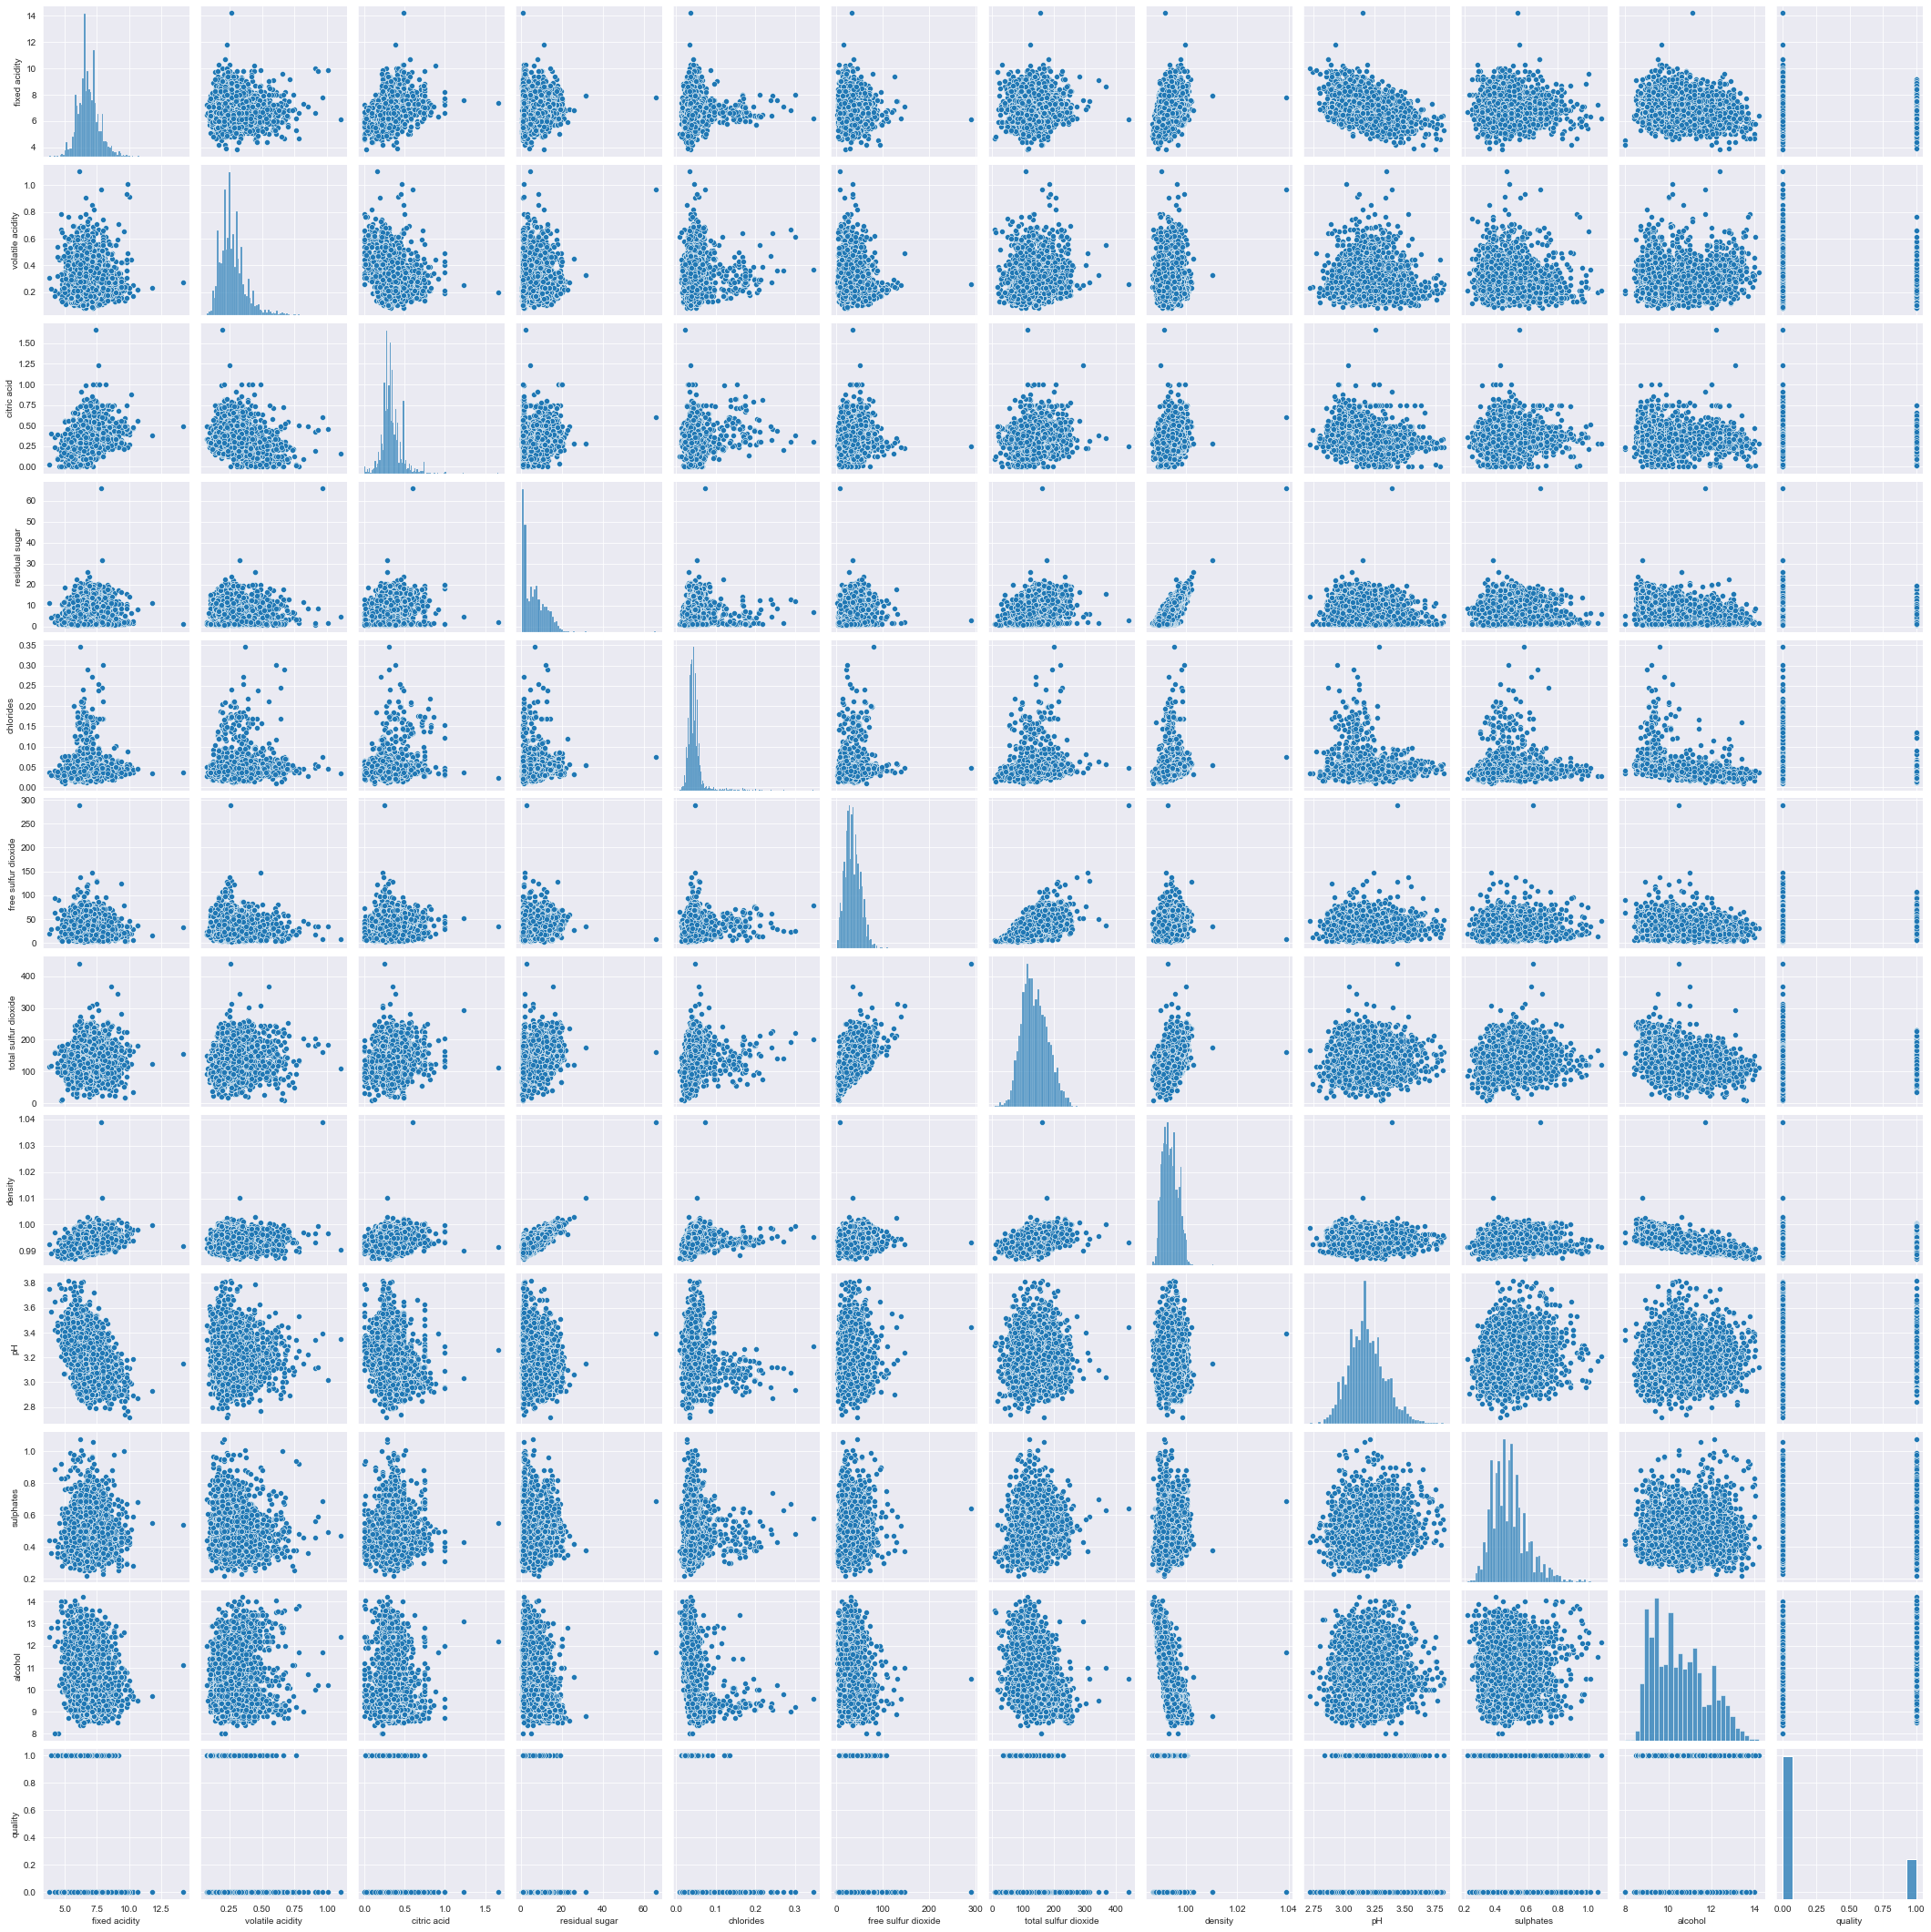

In [6]:
#pairplot for entire dataframe
#find relation of attributes
sbn.pairplot(df)
plt.show()

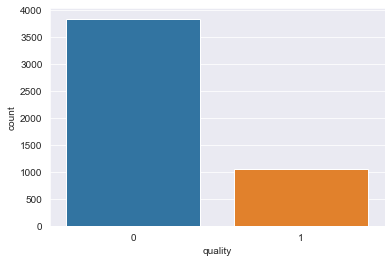

In [7]:
#plotting the response variable
sbn.countplot(df['quality'])
plt.show()

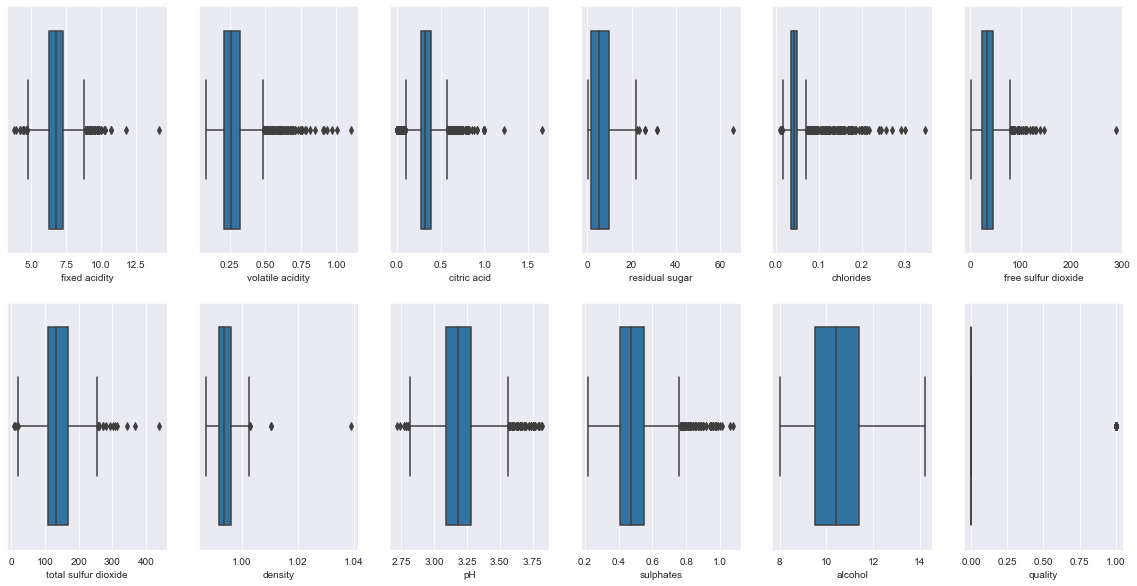

In [8]:
#box plot of dataset
plt.figure(figsize=(20,10))
index=1
for col,value in df.items():
    plt.subplot(2,6,index)
    sbn.boxplot(x=col,data=df)
    index+=1

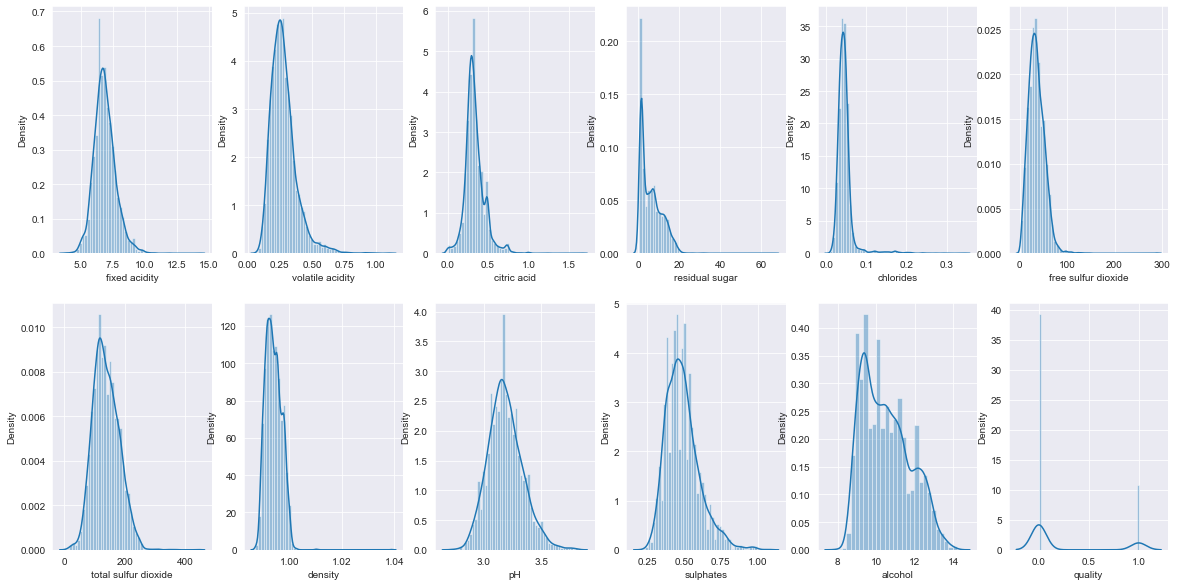

In [9]:
#distplot of all column value
plt.figure(figsize=(20,10))
index=1
for col,value in df.items():
    plt.subplot(2,6,index)
    sbn.distplot(value)
    index+=1

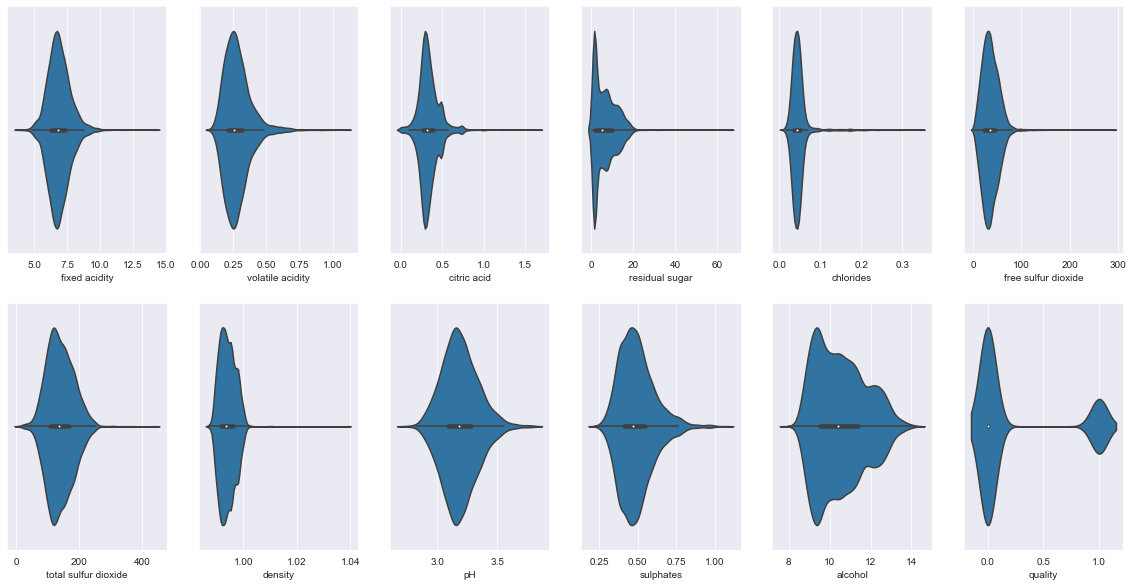

In [10]:
#violin plot of column values
#same as distplot
plt.figure(figsize=(20,10))
index=1
for col,value in df.items():
    plt.subplot(2,6,index)
    sbn.violinplot(value)
    index+=1

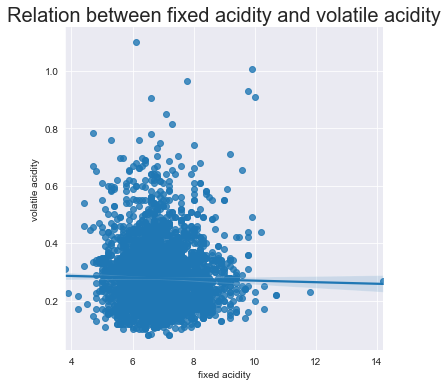

In [11]:
#relation between fixed acidity and volatile acidity
sbn.lmplot(data=df,x='fixed acidity',y='volatile acidity')
plt.title('Relation between fixed acidity and volatile acidity',size=20)
plt.show()

From the above plottings, comparing between volatile acidity and fixed acidity, volatile acidity is slightly decrease.

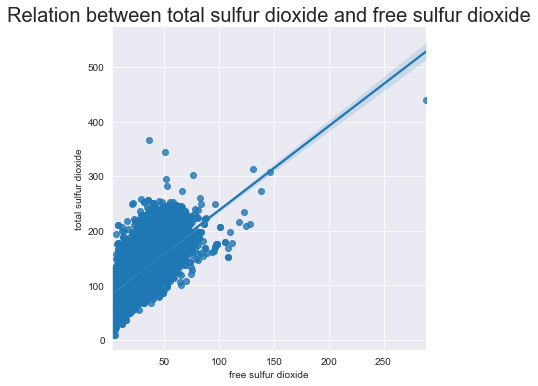

In [12]:
#Relation between total sulfur dioxide and free sulfur dioxide
sbn.lmplot(data=df,x='free sulfur dioxide',y='total sulfur dioxide')
plt.title('Relation between total sulfur dioxide and free sulfur dioxide',size=20)
plt.show()

From the above lmplot, the relation between total sulfur dioxide and free sulfur dioxide
Sudden increases of sulfur dioxide.

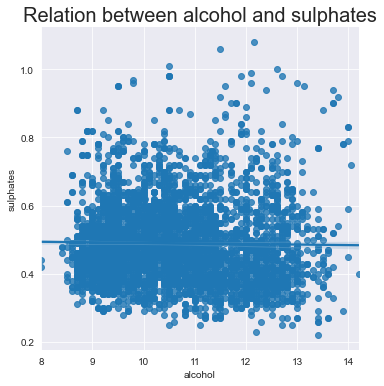

In [13]:
#Relation between alcohol and citric acid
sbn.lmplot(data=df,x='alcohol',y='sulphates')
plt.title('Relation between alcohol and sulphates',size=20)
plt.show()

In this above plotting the alcohol and sulphates are same level

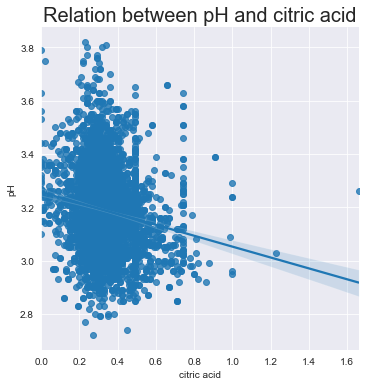

In [14]:
sbn.lmplot(data=df,x='citric acid',y='pH')
plt.title('Relation between pH and citric acid',size=20)
plt.show()

From the particular range of the citric acid the pH level decreasing

<a id="1"></a>

<h1 style="font-family:newtimeroman;font-size:120%;text-align:left">Correlation Matrix</h1>


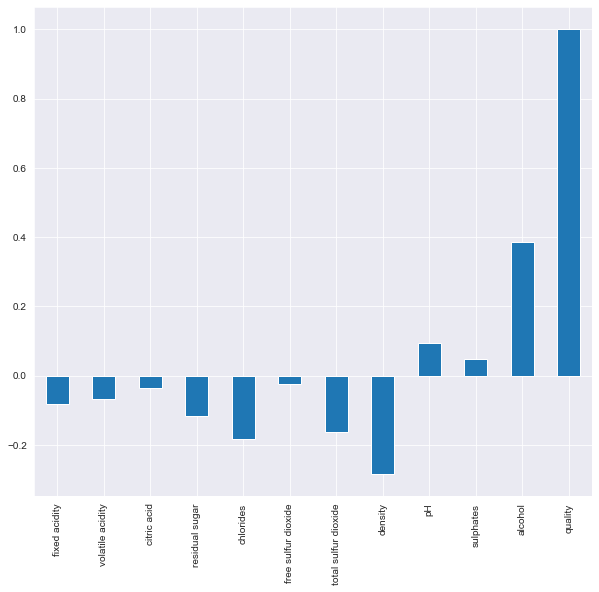

In [15]:
#plotting correlation matrix using bar plot
plt.figure(figsize=(10,9))
df.corrwith(df.quality).plot.bar()
plt.show()

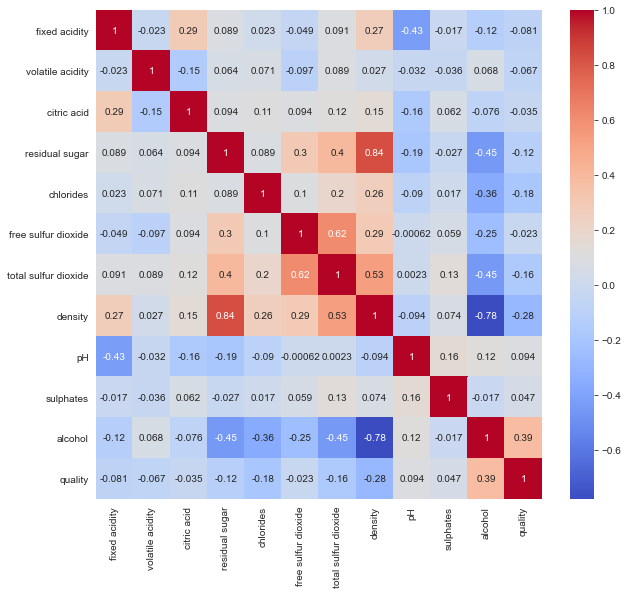

In [16]:
#plotting correlation matrix using heatmap
plt.figure(figsize=(10,9))
corr_matrix=df.corr()
sbn.heatmap(corr_matrix, annot=True,cmap='coolwarm')
plt.show()

>

In [17]:
df.shape

(4898, 12)

In [18]:
#splitting datset into train & test
train=df.iloc[:4398,:] #split for train set

test=df.iloc[4398:,:] #split for test set
test=test.reset_index(drop=True) #reset index of test set
test=test.drop(['quality'],axis=1) #drop the response variable

In [19]:
#viewing the shape
print("train:",train.shape)
print("test:",test.shape)

train: (4398, 12)
test: (500, 11)


In [20]:
train.to_csv('train.csv',index=False) #convert train set to csv

In [21]:
test.to_csv('test.csv',index=False) #convert test set to csv